In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
import jax
# from d4rl.kitchen.kitchen_envs import KitchenBase
import mj_envs.envs.relay_kitchen
import gym
# use cpu
os.environ['JAX_PLATFORM_NAME'] = 'cpu'
jax.config.update('jax_platform_name', 'cpu')
os.environ['CUDA_VISIBLE_DEVICES'] = ''

RS:> Registering Arms Envs


/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_mjrl/lib/python3.9/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']
Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']
RS:> Registering Biomechanics Envs
RS:> Registering Hand Envs
RS:> Registering Kitchen Envs


In [2]:
"""fpath = "/nfs/kun2/users/dashora7/franka_datasets/dibya_micro_open.npy"
ds = np.load(open(fpath, 'rb'), allow_pickle=True).item()
dones = ds['dones_float']
term1 = np.where(dones)[0][0]
actions = ds['actions'][:term1]
rewards = ds['rewards'][:term1]
N = len(actions)
print("Rewards", rewards)"""

fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/r3m_dibya/final_paths_multiview_rb_200/left_cap2/kitchen_micro_open-v3.pickle"
ds = pickle.load(open(fpath, 'rb'))
traj1 = ds[1]
actions = traj1['actions']
N = len(actions)

/home/dashora7/mj_envs/mj_envs/envs/env_base.py:131: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.rwd_dict = self.get_reward_dict(self.obs_dict)


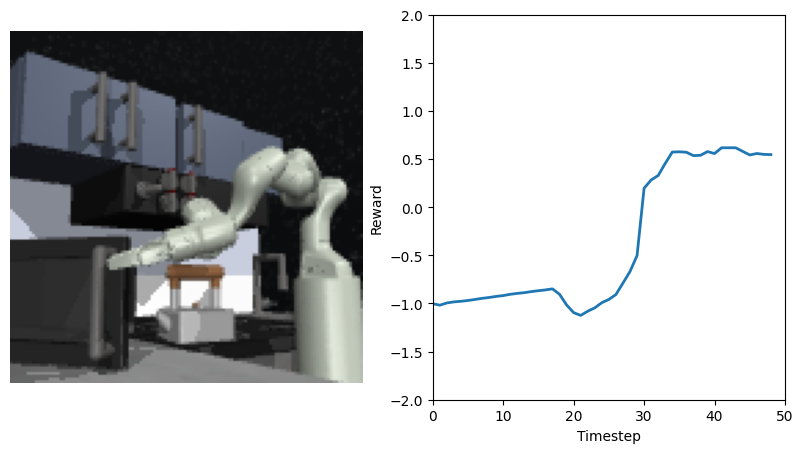

In [6]:
env = gym.make('kitchen_micro_open-v3')
obs = env.reset()
def get_img(environment):
    img = environment.sim.render(
        width=128, height=128, depth=False, camera_name="left_cap2", device_id=-1)
    img = img[::-1,:,:]
    return img

im_obses = [get_img(env)]
rews = []

# show a video of the trajectory along with a plot of the ICVF
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_axis_off()
ax[1].set_xlim(0, 50)
ax[1].set_ylim(-2, 2)
ax[1].set_xlabel("Timestep")
ax[1].set_ylabel("Reward")

for i in range(0, N):
    obs, reward, done, info = env.step(actions[i])
    im_obses.append(get_img(env))
    rews.append(reward)


im = ax[0].imshow(im_obses[0])
line, = ax[1].plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    im.set_array(im_obses[i])
    line.set_data(np.arange(i), rews[:i])
    return line,
ani = animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
HTML(ani.to_jshtml())